In [3]:
import nbimporter
import import_ipynb


import os
import sys

def add_path_to_sys(path):
    module_path = os.path.abspath(path)
    if module_path not in sys.path:
        sys.path.append(module_path)

usePath = os.path.join(r'c:', os.sep,'Users','scrwh','Documents','PythonScripts')
add_path_to_sys(usePath)


import ModelsListDiffFuntions
from ModelsListDiffFuntions import *

# List all the functions defined in the other notebook
print(dir(ModelsListDiffFuntions))

['AbstractRNNCell', 'Activation', 'ActivityRegularization', 'Adam', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'ConfusionMatrixDisplay', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'CreateDir', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DenseFeatures', 'DepthwiseConv1D', 'DepthwiseConv2D', 'DetCurveDisplay', 'Discretization', 'DistanceMetric', 'Dot', 'Dropout', 'ELU', 'EarlyStopping', 'EinsumDense', 'Embedding', 'EvaluateTest', 'FileTree', 'Flatten', 'FolderTree', 'GPUtil', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'Globa

In [5]:
FolderTree('Models')

Models/ (0 files)
    TrainingData1b_2023-08-07 1910/ (13 files)
    TrainingData1_2023-08-07 0040/ (13 files)
    TrainingData1_2023-08-27 1541/ (0 files)
    TrainingData2b_2023-08-08 1526/ (4 files)
    TrainingData2_2023-08-08 1523/ (0 files)
    TrainingData2_2023-08-27 1541/ (0 files)


In [6]:
# Locad the model
model_folder = os.path.join('Models/TrainingData1_2023-08-07 0040')
all_modelsb =  get_file_list(model_folder)
all_modelsb

['Models/TrainingData1_2023-08-07 0040\\TrainingData1_2023-08-07 1910.csv',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Custom_history1_2023-08-07 1907.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Custom_model1_2023-08-07 1907.h5',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Inception-ResNet-V2_history1_2023-08-07 1122.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Inception-ResNet-V2_model1_2023-08-07 1122.h5',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Inception-V2_history1_2023-08-07 0227.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Inception-V2_model1_2023-08-07 0227.h5',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_ResNet-101_history1_2023-08-07 0756.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_ResNet-101_model1_2023-08-07 0756.h5',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_ResNet-50_history1_2023-08-07 0457.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_ResNet-50_model

In [7]:
filtered_list = [file for file in all_modelsb if 'history' in file]
filtered_list

['Models/TrainingData1_2023-08-07 0040\\wind_turbine_Custom_history1_2023-08-07 1907.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Inception-ResNet-V2_history1_2023-08-07 1122.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_Inception-V2_history1_2023-08-07 0227.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_ResNet-101_history1_2023-08-07 0756.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_ResNet-50_history1_2023-08-07 0457.pkl',
 'Models/TrainingData1_2023-08-07 0040\\wind_turbine_VGG16_history1_2023-08-07 1604.pkl']

In [8]:
for f in filtered_list:
    n = os.path.splitext(os.path.basename(f))[0]
    print(n)

wind_turbine_Custom_history1_2023-08-07 1907
wind_turbine_Inception-ResNet-V2_history1_2023-08-07 1122
wind_turbine_Inception-V2_history1_2023-08-07 0227
wind_turbine_ResNet-101_history1_2023-08-07 0756
wind_turbine_ResNet-50_history1_2023-08-07 0457
wind_turbine_VGG16_history1_2023-08-07 1604


In [9]:
import pickle

def load_models(filtered_list):
    model_list = []
    
    for file_path in filtered_list:
        with open(file_path, 'rb') as f:
            model = pickle.load(f)
            model_list.append(model)
    
    return model_list


def get_model_names(filtered_list):
    model_names = []

    for f in filtered_list:
        name = os.path.basename(f)
        file_type = os.path.splitext(name)[1]
        name, _ = os.path.splitext(name)

        date_match = re.search(r'(\d{4}-\d{2}-\d{2} \d{4})', name)
        if date_match:
            date = date_match.group(1)
            name = name.replace(f'_{date}', '')

        name = name.replace('wind_turbine_', '').replace('_history_', '').replace('_history1', '').replace('-','_')
        model_names.append(name)

    return model_names


In [1]:
def plot_training_histories(histories, model_names, output = 'results'):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()

    metrics = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    titles = ['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss']
    ylabels = ['Accuracy', 'Accuracy', 'Loss', 'Loss']
    legends = model_names

    for i, metric in enumerate(metrics):
        axs[i].set_title(titles[i])
        axs[i].set_ylabel(ylabels[i])
        axs[i].set_xlabel('Epoch')

        for j, history in enumerate(histories):
            if 'history' in history:
                history = history['history']
            axs[i].plot(history[metric])

        axs[i].margins(x=0)  # Remove horizontal margins to make full use of the plot

        # Get the maximum number of epochs from all histories
        max_epochs = max([len(history[metric]) for history in histories])

        # Calculate the number of intervals on the x-axis
        num_intervals = 5  # Adjust this value to control the number of intervals
        interval = max_epochs // num_intervals

        # Set the x-axis tick positions and labels
        x_ticks = range(0, max_epochs + 1, interval)
        x_labels = [str(x) for x in x_ticks]
        axs[i].set_xticks(x_ticks)
        axs[i].set_xticklabels(x_labels)

        # Set the last epoch number as the x-axis label
        # axs[i].set_xlabel('Epoch (Last: {})'.format(max_epochs))
        
        axs[i].set_xlabel('Epoch')

    # Create a single legend outside the subplots with additional spacing and a title
    fig.legend(legends, loc='upper right', bbox_to_anchor=(1.16, 0.95), title='Legend')

    plt.tight_layout()
    plt.savefig(os.path.join(output,'training_histories.png'), bbox_inches='tight')
    plt.show()


In [12]:
get_model_names(filtered_list)

['Custom',
 'Inception_ResNet_V2',
 'Inception_V2',
 'ResNet_101',
 'ResNet_50',
 'VGG16']

In [9]:
model_list = load_models(filtered_list)
model_names = get_model_names(filtered_list)
# model_list

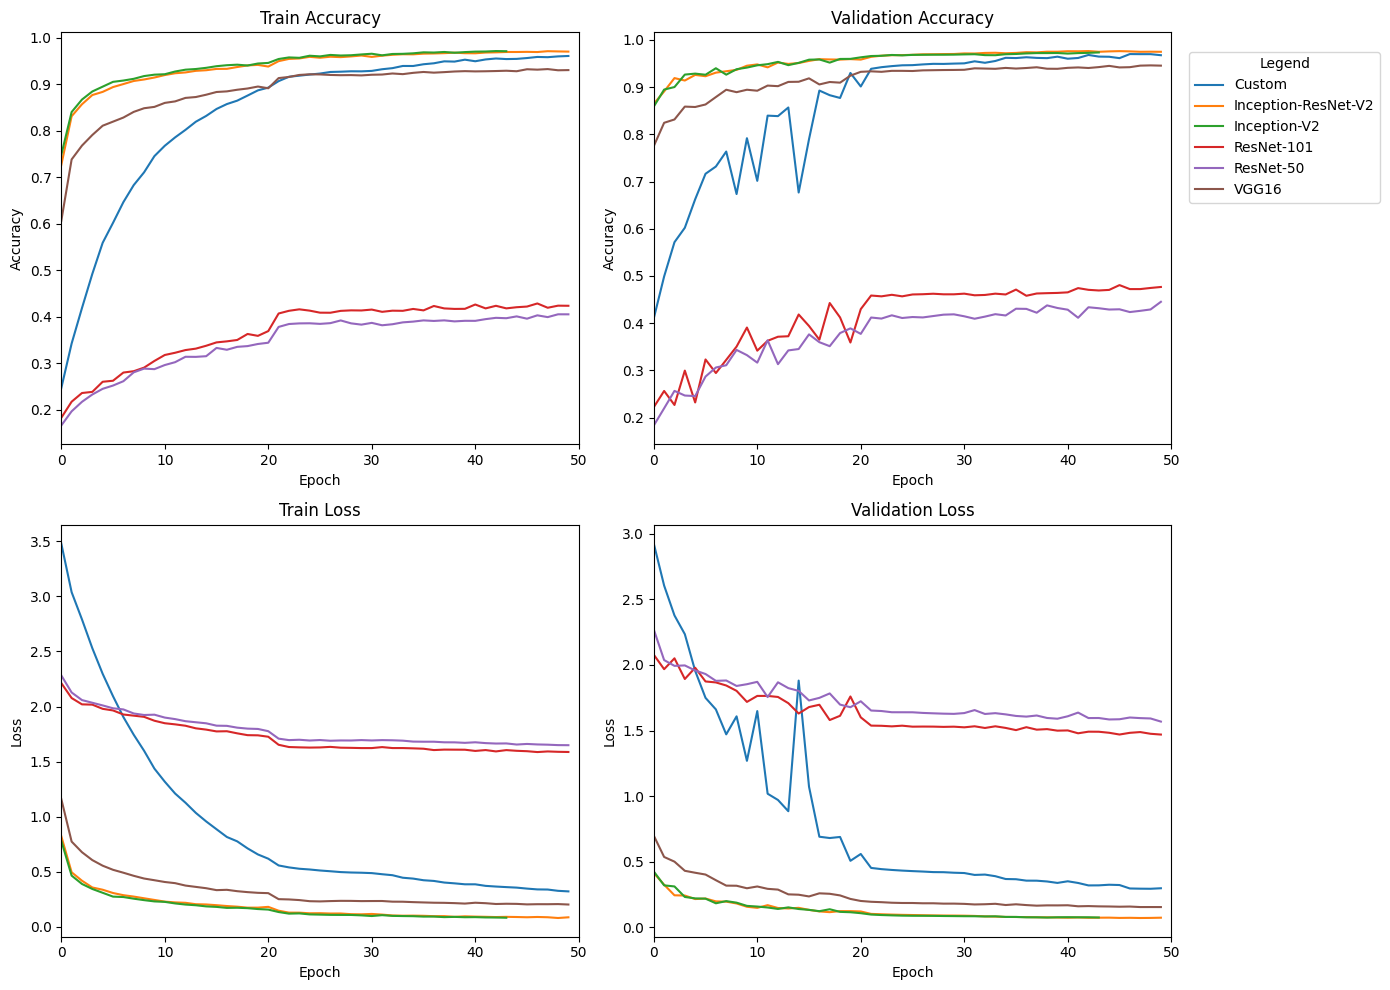

In [10]:
plot_training_histories(model_list, model_names)